# Data Exploration of Copa Dataset

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Note: Dataset Location

Before proceeding, please ensure that the dataset file is located in the same folder as this notebook.
Your directory structure should look something like:

<p style="font-family:monospace">
. <br/>
├── <b>notebooks/</b><br/>
│   ├──Data exploration.ipynb<br/>
├── <b>TABLES_ADD_20240515/</b><br/>
│   ├── EQP_ASSMBL.csv<br/>
│   ├── EQP_ASSMBL_BOM.csv<br/>
│   ├── EVT_EVENT_REL.csv<br/>
│   ├── EVT_INV.csv<br/>
│   ├── EVT_LOC.csv<br/>
│   ├── FL_LEG_DISRUPT.csv<br/>
│   ├── INV_AC_REG.csv<br/>
│   ├── ISDP LOGBOOK REPORT.csv<br/>
│   ├── ISDP LOGBOOK REPORT_query.txt<br/>
│   └── SCHED_ACTION.csv<br/>
</p>

___

## ISDP LOGBOOK REPORT.csv

This file contains a comprehensive record of faults along with their associated ATA (Air Transport Association) codes. The following columns are particularly useful:

- **FAULT_NAME**: Unique identifier for each fault.
- **FAULT_SDESC**: Detailed description of the fault.
- **ATA**: Standard code that categorizes the fault based on the ATA chapter.


These columns will help in analyzing the faults, their frequency, and the effectiveness of the resolutions.


### 1. Load and Inspect the Data

First, we load the dataset using `pandas` and display basic information about the DataFrame, including its structure and the first few rows.


In [4]:
df = pd.read_csv('TABLES_ADD_20240515/ISDP LOGBOOK REPORT.csv',encoding='latin1',low_memory=False)

<p style="page-break-after:always;"></p>

### 2. Analyze the Distribution of ATA Codes

Next, we calculate and display the number of unique ATA codes in the dataset. We also examine the frequency of each ATA code to understand which faults are most common.


In [32]:
# Number of unique classes
unique_class_column = 'ATA'
num_unique_classes = df[unique_class_column].nunique()
df['ATA_trunc'] = df['ATA'].str[:2]
# print(df['ATA_trunc'])
num_unique_classes = df['ATA_trunc'].nunique()
# print(df['ATA_trunc'].unique())
print(f"==> {df['ATA_trunc'].sort_values().unique()=}")
print(f"==> {df['ATA_trunc'].value_counts()=}")
# print(f"{df.nunique()=}")
print(f'Number of unique classes: {num_unique_classes}')

# Frequency of each class
class_counts = df["ATA_trunc"].value_counts()
print(class_counts)

==> df['ATA_trunc'].sort_values().unique()=array(['00', '01', '02', '05', '06', '07', '08', '09', '10', '11', '12',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '44', '45', '46',
       '47', '49', '50', '51', '52', '53', '54', '55', '56', '57', '70',
       '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '91',
       '99', 'AP', 'CF', 'ER', 'LE'], dtype=object)
==> df['ATA_trunc'].value_counts()=ATA_trunc
25    387939
05    219305
10     82384
12     75911
32     72802
33     49166
01     19662
27     19419
52     17373
29     17244
00     16647
34     16612
53     16005
21     15415
35     14997
23     14768
57     12885
38      9262
71      8250
31      8002
09      7659
11      7132
22      6886
44      6745
28      6323
26      6243
78      6217
49      5630
30      5108
36      4756
73      4617
24      4570
72      4426
56      3787
50      3691
55      3337
20      3131
47      3114
5

### 3. Visualize the Most Frequent ATA Codes

We create a bar plot to visualize the top 20 most frequent ATA codes. This helps us identify the most common categories of faults recorded in the logbook.


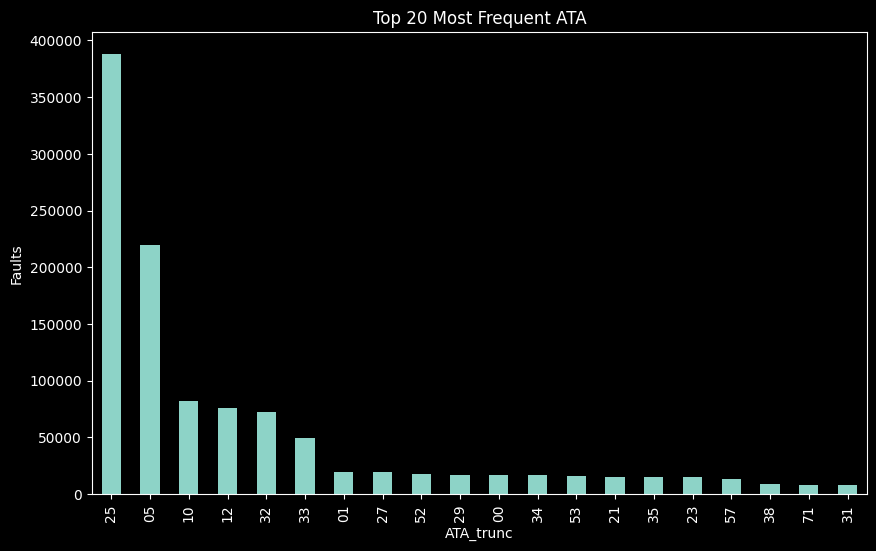

In [33]:
# Plot the top 20 most frequent classes
top_classes = class_counts.head(20)
plt.figure(figsize=(10, 6))
top_classes.plot(kind='bar')
plt.title('Top 20 Most Frequent ATA')
plt.xlabel('ATA_trunc')
plt.ylabel('Faults')
plt.show()

### 4. Distribution of Fault Found Dates

In this section, we analyze the distribution of the `FAULT_FOUND_DATE` column to understand the time periods during which faults were most frequently identified.

First, we convert the `FAULT_FOUND_DATE` column to datetime format to ensure proper handling of date values. Then, we plot a histogram to visualize the frequency of fault occurrences over time. This helps us identify patterns or trends in the fault occurrences and can be useful for scheduling maintenance or identifying periods with higher fault rates.


/tmp/ipykernel_15691/1826581454.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FAULT_FOUND_DATE'] = pd.to_datetime(df['FAULT_FOUND_DATE'], errors='coerce')


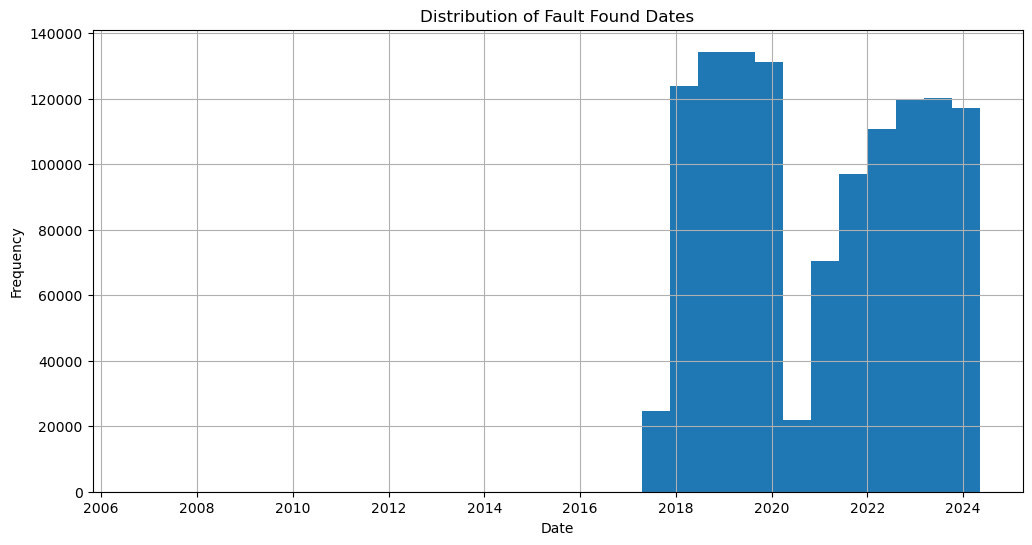

In [5]:
# Convert the FAULT_FOUND_DATE column to datetime
df['FAULT_FOUND_DATE'] = pd.to_datetime(df['FAULT_FOUND_DATE'], errors='coerce')

# Plot a histogram of FAULT_FOUND_DATE
plt.figure(figsize=(12, 6))
df['FAULT_FOUND_DATE'].dropna().hist(bins=30)
plt.title('Distribution of Fault Found Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

### 5. Top 5 Most Occurring ATA Classes

In this section, we focus on the top 5 most frequently occurring ATA classes to gain deeper insights into the nature of these faults. We will perform the following analyses:




First, we filter the dataset to include only the records from the top 5 most frequent ATA classes. We then display the basic information about this filtered data and inspect the first few rows to understand the structure and content of the dataset.


In [7]:
top_5_classes = class_counts.head(5).index
df_top_5 = df[df[unique_class_column].isin(class_counts.head(5).index)]

We plot histograms for the `FAULT_FOUND_DATE` column for each of the top 5 ATA classes. This visual representation helps us understand the distribution of fault occurrences over time, highlighting any patterns or trends specific to each class.

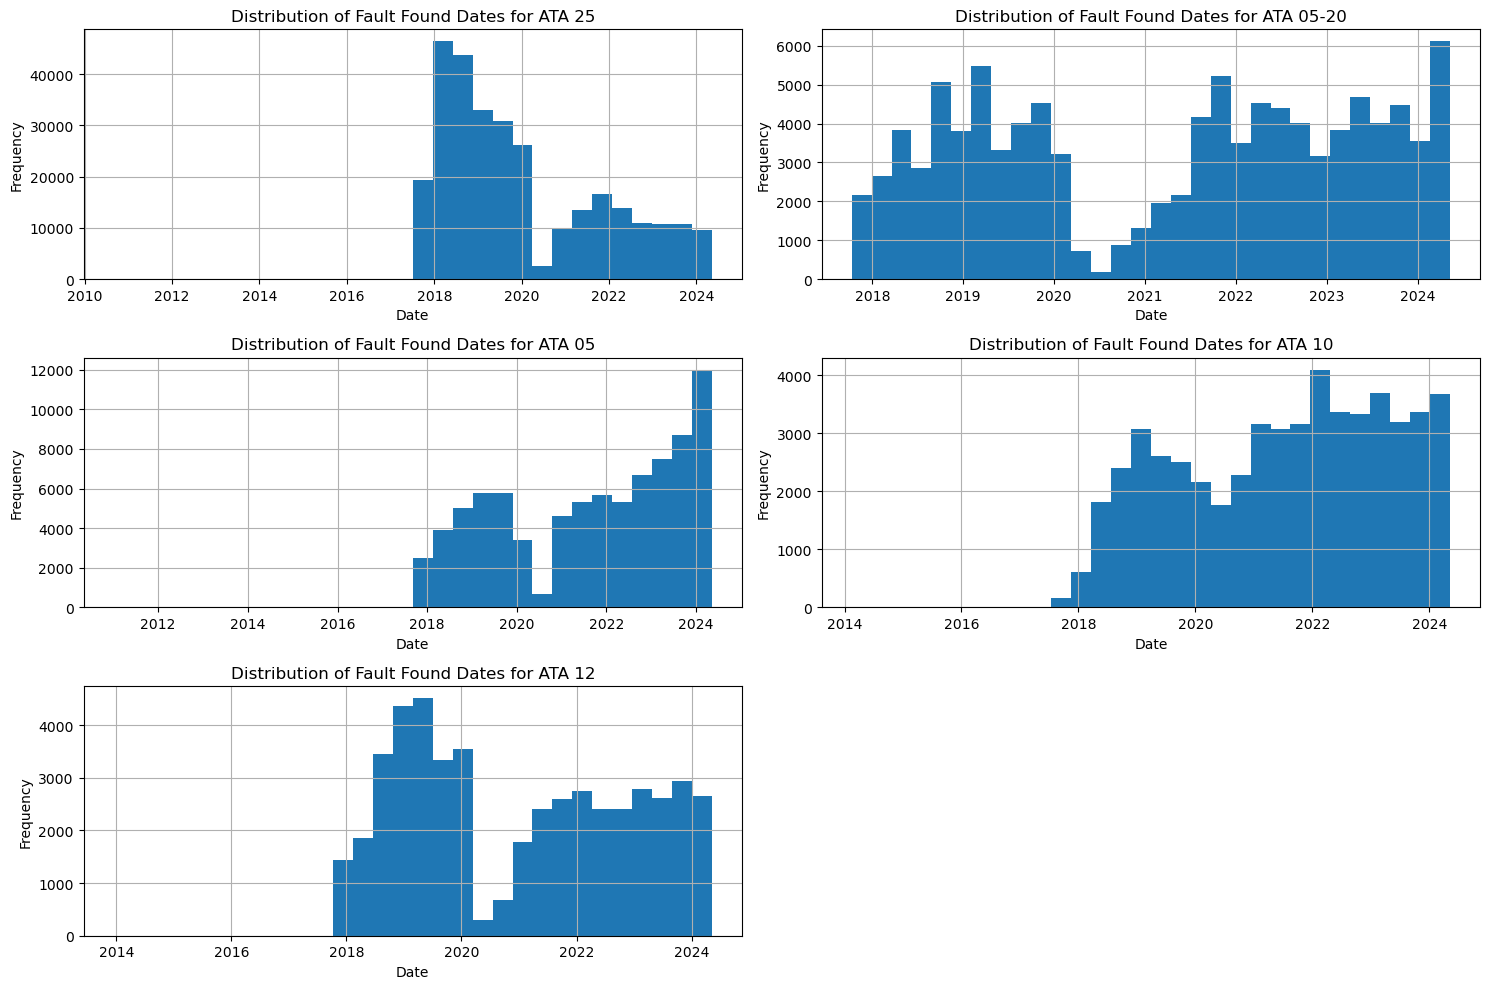

In [22]:
plt.figure(figsize=(15, 10))
for i, ata_class in enumerate(top_5_classes, start=1):
    plt.subplot(3, 2, i)
    class_data = df_top_5[df_top_5[unique_class_column] == ata_class]
    class_data['FAULT_FOUND_DATE'].dropna().hist(bins=30)
    plt.title(f'Distribution of Fault Found Dates for ATA {ata_class}')
    plt.xlabel('Date')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

___

## Fault Severity Analysis

The dataset contains a column named `FAULT_SEVERITY`, which indicates the severity level of each fault recorded. This column is crucial for understanding the impact and urgency of the faults. We will perform a detailed analysis of the `FAULT_SEVERITY` column to gain insights into the distribution and characteristics of fault severity levels in the dataset.

We will start by looking at available unique values for severity.

In [13]:
df['FAULT_SEVERITY'].unique()

array(['UNKNOWN', 'MEL', 'DIP', 'FUP', 'INT', 'AOG', 'INFO', 'OIL', 'CDL',
       'MINOR', 'EXT', 'SDP', 'NEF', 'CLN', 'HCK', 'WAS', 'INFO-MOT',
       'INFO-MAP'], dtype=object)

### Visualizing Fault Severity

We will start by visualizing the distribution of fault severity levels, both including and excluding unknown values, to understand the overall frequency and identify any potential issues with missing or unclear data.

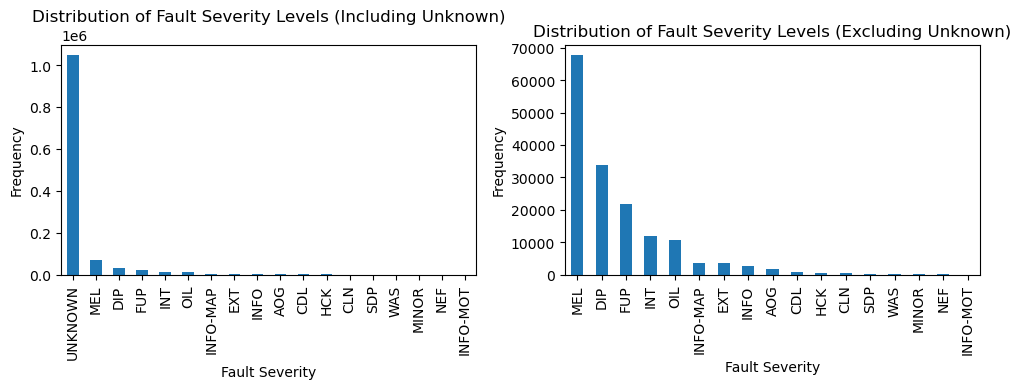

In [16]:
known_severity_df = df[df['FAULT_SEVERITY'] != 'UNKNOWN']

# Create a side-by-side bar plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot including unknown values
df['FAULT_SEVERITY'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Distribution of Fault Severity Levels (Including Unknown)')
axs[0].set_xlabel('Fault Severity')
axs[0].set_ylabel('Frequency')

# Plot excluding unknown values
known_severity_df['FAULT_SEVERITY'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('Distribution of Fault Severity Levels (Excluding Unknown)')
axs[1].set_xlabel('Fault Severity')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
# Calculate the total number of rows in the dataset
total_rows = len(df)

# Calculate the number of rows where FAULT_SEVERITY is 'UNKNOWN'
unknown_count = df['FAULT_SEVERITY'].str.upper().value_counts().get('UNKNOWN', 0)

# Calculate the percentage of 'UNKNOWN' values
unknown_percentage = (unknown_count / total_rows) * 100

print(f'Percentage of UNKNOWN values: {unknown_percentage:.2f}%')


Percentage of UNKNOWN values: 86.79%


We can see that more than 80% of the values for severity are unknown. 
Let us focus on the top 5 of the severity classes.

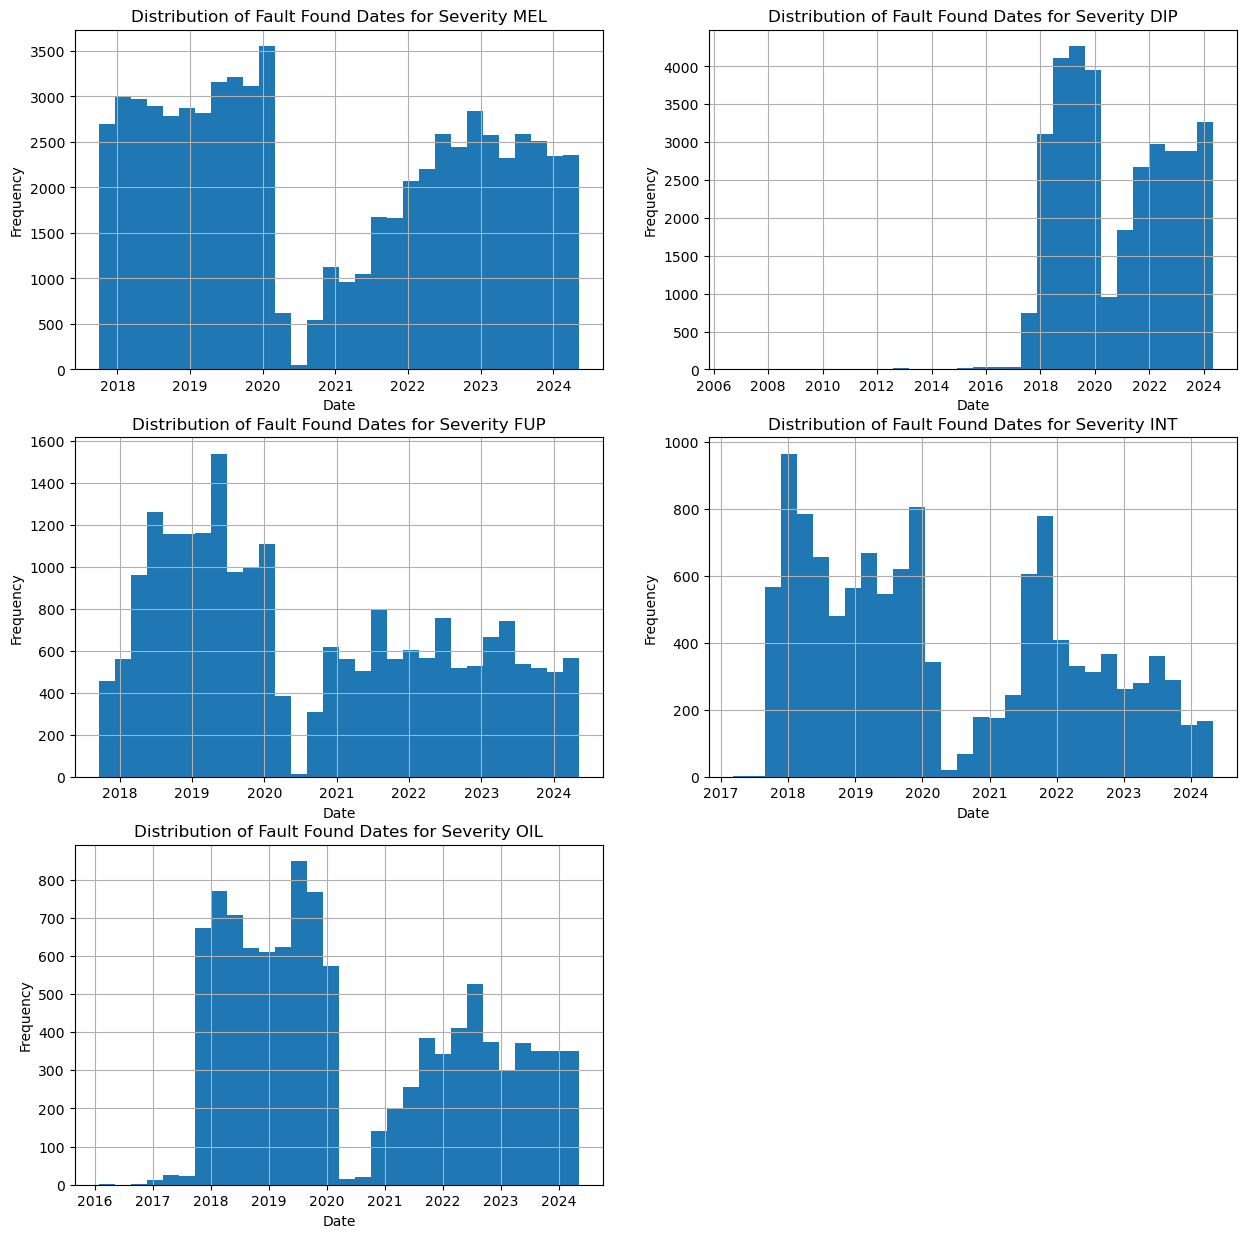

In [59]:
value_counts = known_severity_df['FAULT_SEVERITY'].value_counts()
top_5_severity = value_counts.head(5).index.to_list()
separated_severity_dfs = {value: df[df['FAULT_SEVERITY'] == value] for value in top_5_severity}
plt.figure(figsize=(15, 15))
for i, severity in enumerate(separated_severity_dfs.items(), start=1):
    plt.subplot(3, 2, i)
    severity_data = df_top_5_severity[df_top_5_severity['FAULT_SEVERITY'] == severity[0]]
    severity_data['FAULT_FOUND_DATE'].dropna().hist(bins=30)
    plt.title(f'Distribution of Fault Found Dates for Severity {severity[0]}')
    plt.xlabel('Date')
    plt.ylabel('Frequency')

---

<p style="page-break-after:always;"></p>


## SCHED_ACTION.csv

This file contains information about the actions performed. The following columns are particularly useful:

- **ACTION_LDESC** : A description of the action performed. 

In [6]:
df = pd.read_csv('TABLES_ADD_20240515/SCHED_ACTION.csv',encoding='latin1',low_memory=False)

### Conversion to Datetime Format

We use the `pd.to_datetime` function to convert these columns from their original string format to `datetime` objects. The format provided (`'%d-%b-%y'`) specifies that the dates are in the format `day-month-year`, with the month represented by its abbreviated name (e.g., `01-Jan-21`). Additionally, for `REVISION_DT` and `CANCEL_DT`, we use the `errors='coerce'` parameter to handle any invalid date formats by converting them to `NaT` (Not a Time).


In [7]:
# Convert date columns to datetime
df['ACTION_DT'] = pd.to_datetime(df['ACTION_DT'], format='%d-%b-%y')
df['CREATION_DT'] = pd.to_datetime(df['CREATION_DT'], format='%d-%b-%y')
df['REVISION_DT'] = pd.to_datetime(df['REVISION_DT'], format='%d-%b-%y', errors='coerce')
df['CANCEL_DT'] = pd.to_datetime(df['CANCEL_DT'], format='%d-%b-%y', errors='coerce')

# Display date range and missing dates
print(df[['ACTION_DT', 'CREATION_DT', 'REVISION_DT', 'CANCEL_DT']].describe())


                           ACTION_DT                    CREATION_DT  \
count                        2569564                        2569564   
mean   2020-12-07 05:47:21.400331008  2020-12-07 03:32:05.752386048   
min              2017-10-09 00:00:00            2017-10-09 00:00:00   
25%              2019-01-28 00:00:00            2019-01-28 00:00:00   
50%              2020-12-03 00:00:00            2020-12-03 00:00:00   
75%              2022-10-23 00:00:00            2022-10-23 00:00:00   
max              2024-05-10 00:00:00            2024-05-10 00:00:00   

                         REVISION_DT            CANCEL_DT  
count                        2569564                    6  
mean   2020-12-07 05:36:35.677709568  2021-04-10 08:00:00  
min              2017-10-09 00:00:00  2017-10-14 00:00:00  
25%              2019-01-28 00:00:00  2018-12-07 06:00:00  
50%              2020-12-03 00:00:00  2022-03-01 00:00:00  
75%              2022-10-23 00:00:00  2023-06-06 00:00:00  
max        

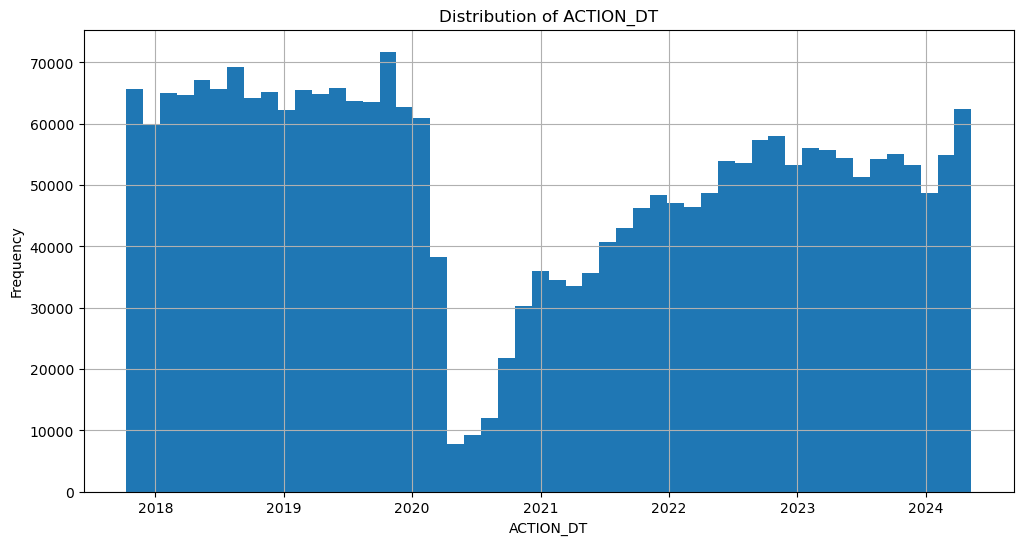

In [8]:
# Plot the distribution of ACTION_DT
plt.figure(figsize=(12,6))
df['ACTION_DT'].hist(bins=50)
plt.title('Distribution of ACTION_DT')
plt.xlabel('ACTION_DT')
plt.ylabel('Frequency')
plt.show()